# Explore Weather Trends 

## Outline

1. Use SQL to extract data of city_list, global_data and city_data, export to csv.
2. Use Excel to combined data and calculate the moving average(average function) 
3. Use Python to plot line chart and did a correlation.
4. The key considerations of visualize the trend is the relation between the Temperature and time, and the relation of moving average of temperature with time.

In [255]:
#Import necessary dictionaries
!pip3 install --upgrade pip
!pip install pingouin
!pip install seaborn --upgrade
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg

In [256]:
#Import data and make a dataframe
df=pd.read_csv('/Users/yaokexin/Desktop/weather_trend.csv',header=0)

In [257]:
df.head()

,year,avg_temp,7-Year MA,berlin avg_temp,berlin7-Year MA
0,1750,8.72,NaN,9.83,NaN
1,1751,7.98,NaN,9.75,NaN
2,1752,5.78,NaN,4.84,NaN
3,1753,8.39,NaN,8.72,NaN
4,1754,8.47,NaN,8.49,NaN


In [258]:
df.isnull().sum()

year               0
avg_temp           0
7-Year MA          6
berlin avg_temp    2
berlin7-Year MA    8
dtype: int64

## plot the line chart 

(5.0, 11.0)

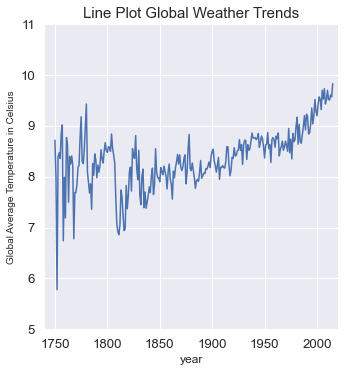

In [259]:

sns.set_style("darkgrid") 
sns.relplot(x="year", y="avg_temp", kind="line", data=df)
plt.xlabel("year", size=12)
plt.ylabel("Global Average Temperature in Celsius", size=10)
plt.title("Line Plot Global Weather Trends", size=15)
plt.xlim(xmin=1740, xmax=2020) # Used these limits from the max and mins from the two data sets
plt.ylim(ymin=5, ymax=11)

(5.0, 11.0)

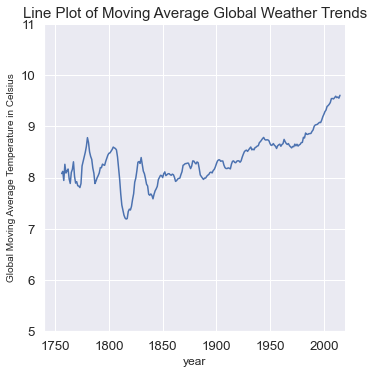

In [260]:
sns.relplot(x="year", y="7-Year MA", kind="line", data=df)
plt.xlabel("year", size=12)
plt.ylabel("Global Moving Average Temperature in Celsius", size=10)
plt.title("Line Plot of Moving Average Global Weather Trends", size=15)
plt.xlim(xmin=1740, xmax=2020) 
plt.ylim(ymin=5, ymax=11)

(4.0, 12.0)

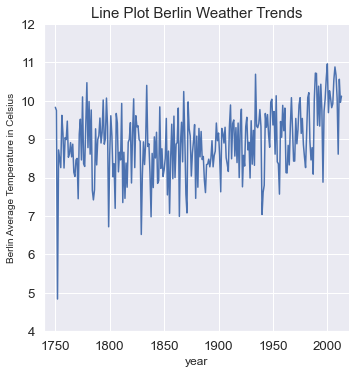

In [261]:
sns.relplot(x="year", y="berlin avg_temp", kind="line", data=df)
plt.xlabel("year", size=12)
plt.ylabel("Berlin Average Temperature in Celsius", size=10)
plt.title("Line Plot Berlin Weather Trends", size=15)
plt.xlim(xmin=1740, xmax=2020) 
plt.ylim(ymin=4, ymax=12)

(5.0, 11.0)

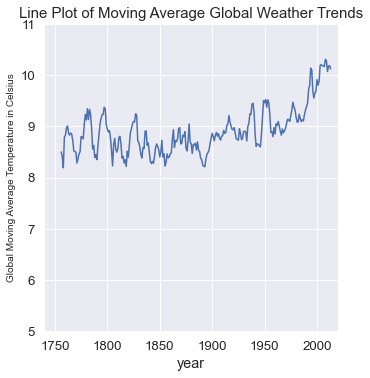

In [262]:
sns.relplot(x="year", y="berlin7-Year MA", kind="line", data=df)
plt.ylabel("Global Moving Average Temperature in Celsius", size=10)
plt.title("Line Plot of Moving Average Global Weather Trends", size=15)
plt.xlim(xmin=1740, xmax=2020) 
plt.ylim(ymin=5, ymax=11)

Text(0.5, 1.0, 'Line Chart of Berlin & Global Temperatures')

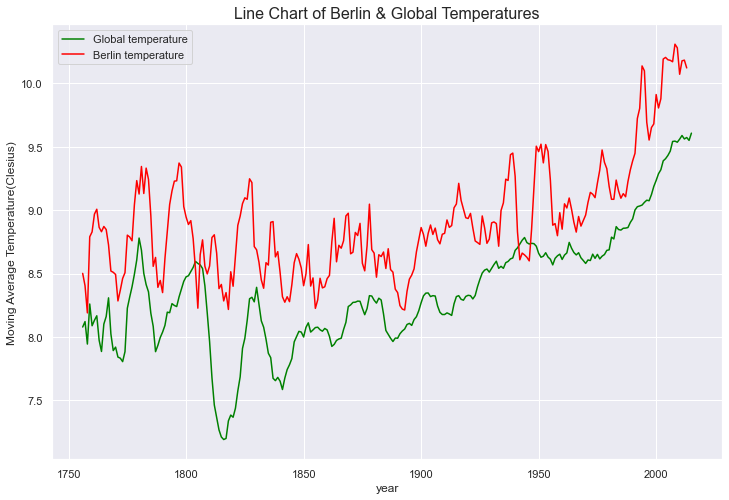

In [263]:
sns.set(rc={'figure.figsize':(12,8)}) 
sns.lineplot(x="year", y='7-Year MA', data=df, label='Global temperature', color='green',size_norm=10)
sns.lineplot(x="year", y='berlin7-Year MA', data=df, label="Berlin temperature", color='red',size_norm=10)
plt.xlabel("year", size=12)
plt.ylabel("Moving Average Temperature(Clesius)", size=12)
plt.title("Line Chart of Berlin & Global Temperatures", size=16)

## Calculate the correlation coefficient 

In [264]:
pg.corr(x=df['year'], y=df['avg_temp'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,266,0.622775,"[0.54, 0.69]",0.387848,0.383193,5.744760e-30,6.449e+26,1.0


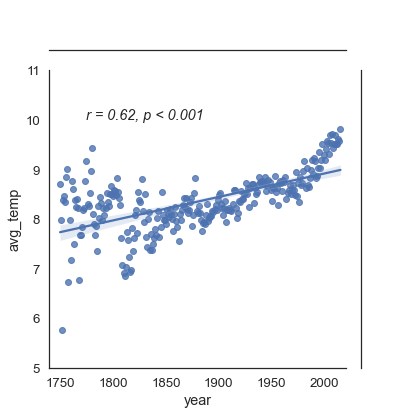

In [265]:
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)
g = sns.JointGrid(data=df, x='year', y='avg_temp', xlim=(1740, 2020), ylim=(5, 11))
g = g.plot_joint(sns.regplot)
g.ax_joint.text(1775,10,'r = 0.62, p < 0.001', fontstyle='italic')
plt.tight_layout()


In [266]:
pg.corr(x=df['year'], y=df['7-Year MA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,260,0.73107,"[0.67, 0.78]",0.534464,0.530841,9.915226e-45,2.49e+41,1.0


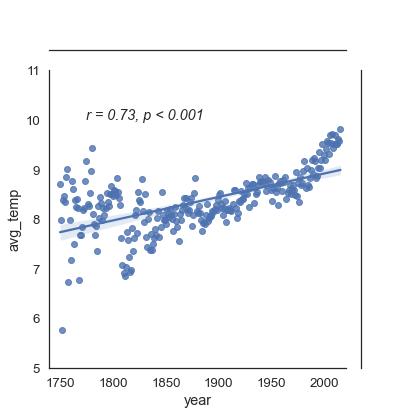

In [267]:
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)
g = sns.JointGrid(data=df, x='year', y='avg_temp', xlim=(1740, 2020), ylim=(5, 11))
g = g.plot_joint(sns.regplot)
g.ax_joint.text(1775,10,'r = 0.73, p < 0.001', fontstyle='italic')
plt.tight_layout()

In [268]:
pg.corr(x=df['year'], y=df['berlin avg_temp'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,264,0.327048,"[0.21, 0.43]",0.10696,0.100117,5.358546e-08,1.881e+05,0.999796


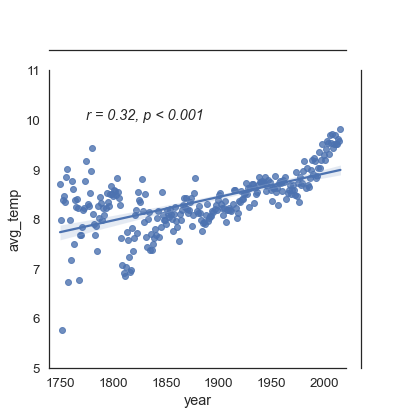

In [269]:
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)
g = sns.JointGrid(data=df, x='year', y='avg_temp', xlim=(1740, 2020), ylim=(5, 11))
g = g.plot_joint(sns.regplot)
g.ax_joint.text(1775,10,'r = 0.32, p < 0.001', fontstyle='italic')
plt.tight_layout()

In [270]:
pg.corr(x=df['year'], y=df['berlin7-Year MA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,258,0.598276,"[0.51, 0.67]",0.357934,0.352898,1.939660e-26,2.147e+23,1.0


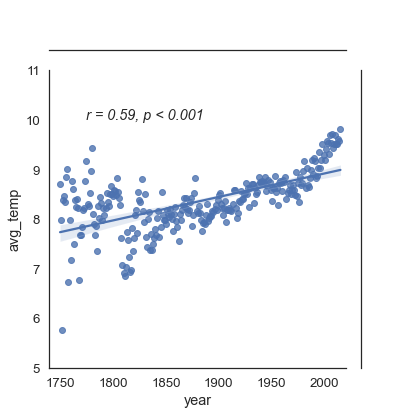

In [271]:
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)
g = sns.JointGrid(data=df, x='year', y='avg_temp', xlim=(1740, 2020), ylim=(5, 11))
g = g.plot_joint(sns.regplot)
g.ax_joint.text(1775,10,'r = 0.59, p < 0.001', fontstyle='italic')
plt.tight_layout()

## Observations

1. In general, the world's temperature is increasing with time, and the rate is becoming faster lately. But around 1820, there was a significant low temperature compare to other time.
2. Berlin's temperature was also increasing with time and the rate also becoming faster lately.
3. Compare the world's temperature and Berlin's temperature, as we can see,Berlin's Temperature is always higher than the world average temperature, and the gap was greatest around 1820.
4. From the p value of the correlation coefficient, the temperature and the time have a strong correlation.